# **Restaurant revenue forecast**

In this notebook, we have code that builds a deep learning regression model that predicts monthly revenue for a restaurant. 

#### Notebook structure (**follows CRISP-DM framework**)

1. Business value<br>
2. Exploatory Data Analysis<br>
3. Data Selection<br>
4. Feature selection<br>
5. Modellingt<br>
6. Evaluation<br>

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

# <label style="color:blue" id="Exploratory-Data-Analysis">Part I : Business value</label>
Forecasting business mertics is very important for all businesses. I helps businesses be proactive. 
Imagine you know next month your business : <br/><br/>
`1`. is not going to make profit,meaning you are going to make a loss, <br/><br/>
`2`. with that knowledge you can react proactively by putting campaigns that are going to help you avoid running a loss. 

In [1]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import pandas as pd 
import seaborn as sns
from scipy.stats import skew
import warnings
import pickle
import numpy as np
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, median_absolute_error
)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
restaurant_data = pd.read_csv("Restaurant_revenue.csv")

# <label style="color:blue" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</label>


`1.` What is the distribution of all numeric variables?  <br/>
`2.` What is the distribution of our target variable, monthly revenue? <br/>
`3.` What is the distribution of customer spending, menu price, and number of customer? <br/>
`4.` What is the statistical attributes of the data looking at numerical columns? 

In [3]:
restaurant_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [4]:
restaurant_data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [5]:
restaurant_data.Cuisine_Type.value_counts()

Japanese    262
American    256
Mexican     250
Italian     232
Name: Cuisine_Type, dtype: int64

In [6]:
restaurant_data.Promotions.value_counts()

0    503
1    497
Name: Promotions, dtype: int64

<Figure size 1200x400 with 0 Axes>

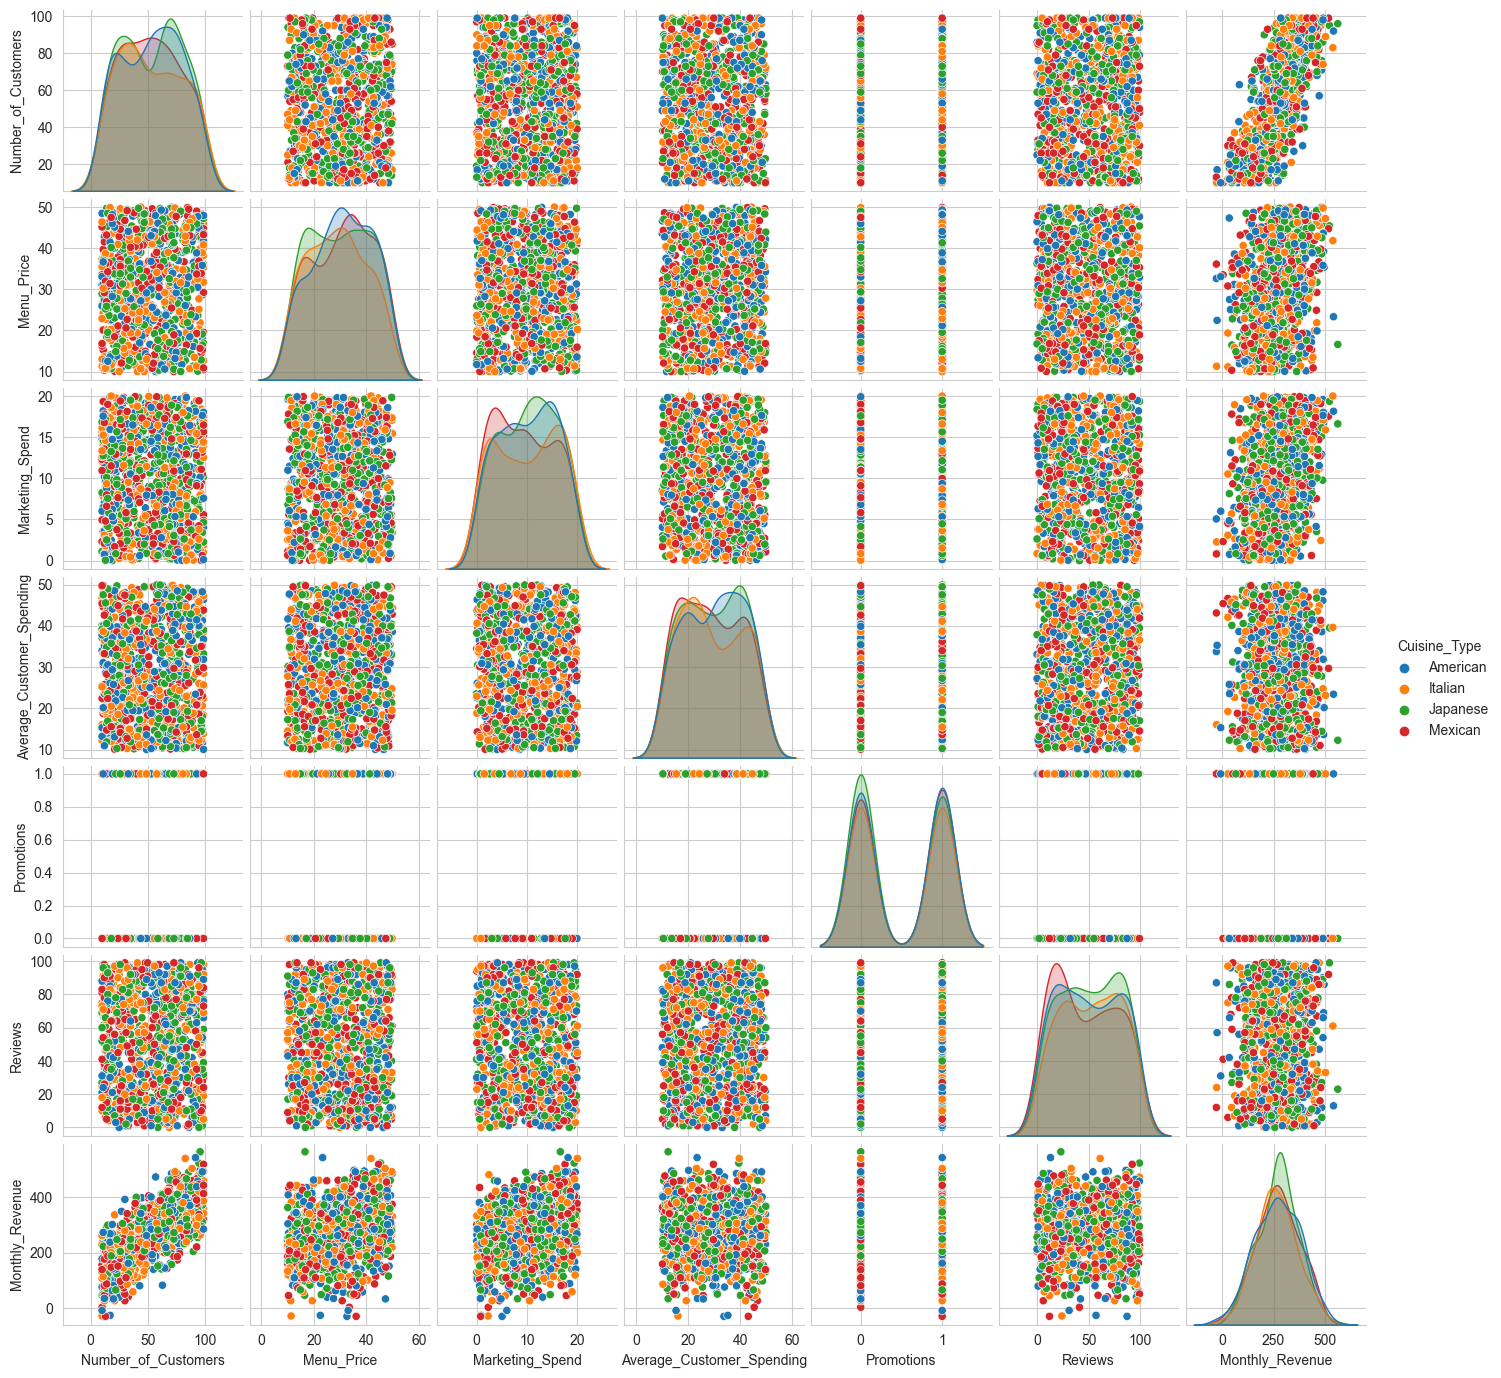

In [7]:
restaurant_data = restaurant_data.loc[:, ~restaurant_data.columns.duplicated()]
required_columns = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews','Monthly_Revenue','Cuisine_Type']
missing_columns = [col for col in required_columns if col not in restaurant_data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in DataFrame: {missing_columns}")
training_data_cleaned = restaurant_data.dropna(subset=required_columns)
training_data_cleaned['Cuisine_Type'] = training_data_cleaned['Cuisine_Type'].astype('category')
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.pairplot(training_data_cleaned[required_columns], height=2, hue='Cuisine_Type')
plt.show()


<Figure size 1200x400 with 0 Axes>

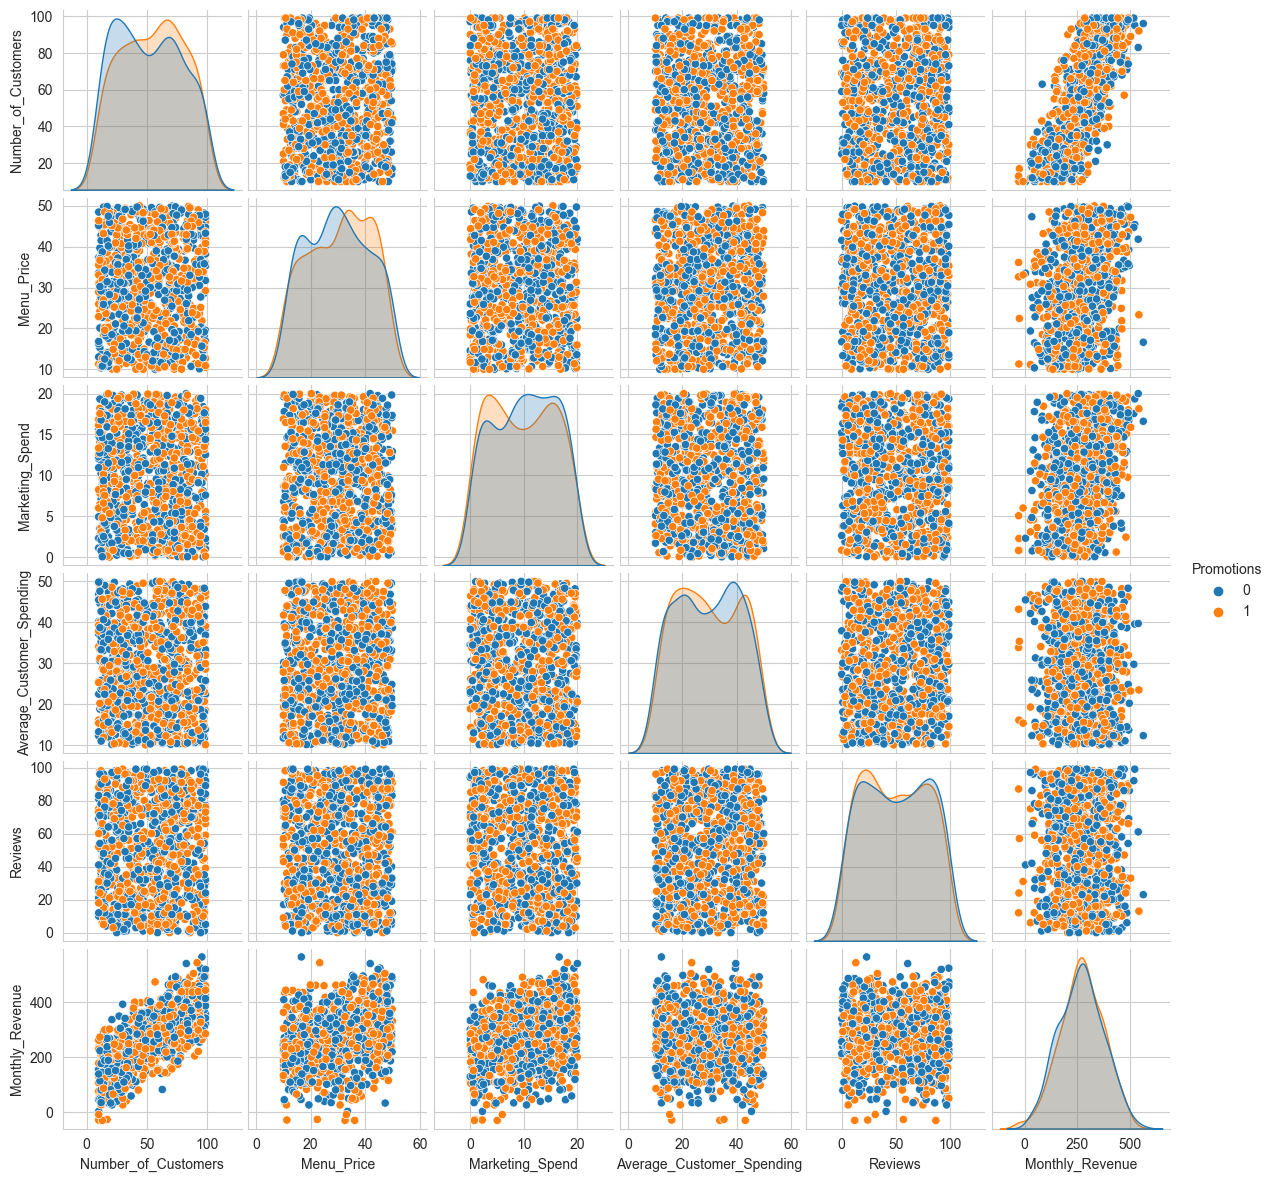

In [8]:
restaurant_data = restaurant_data.loc[:, ~restaurant_data.columns.duplicated()]
required_columns = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews','Monthly_Revenue','Cuisine_Type']
missing_columns = [col for col in required_columns if col not in restaurant_data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in DataFrame: {missing_columns}")
training_data_cleaned = restaurant_data.dropna(subset=required_columns)
training_data_cleaned['Promotions'] = training_data_cleaned['Promotions'].astype('category')
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.pairplot(training_data_cleaned[required_columns], height=2, hue='Promotions',)
plt.show()

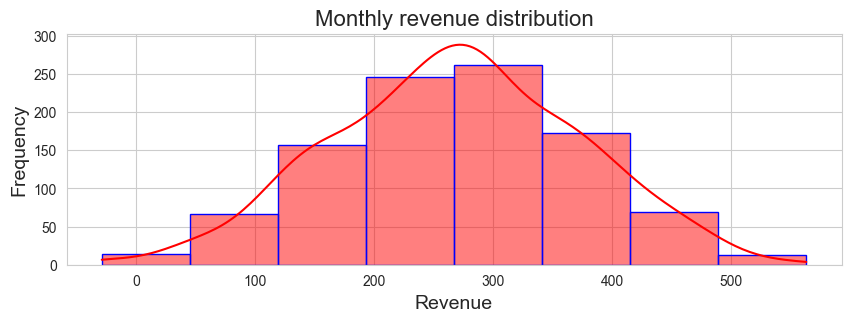

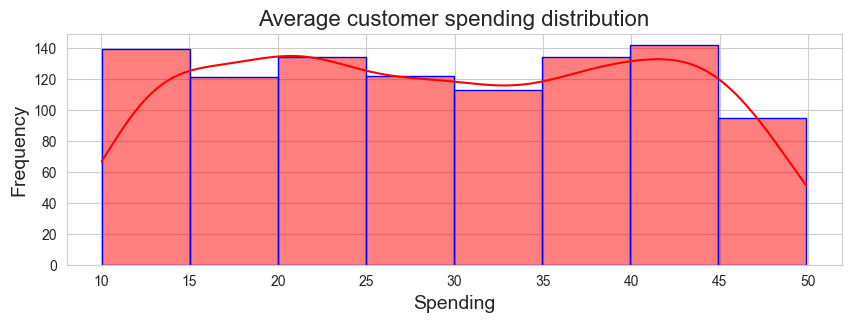

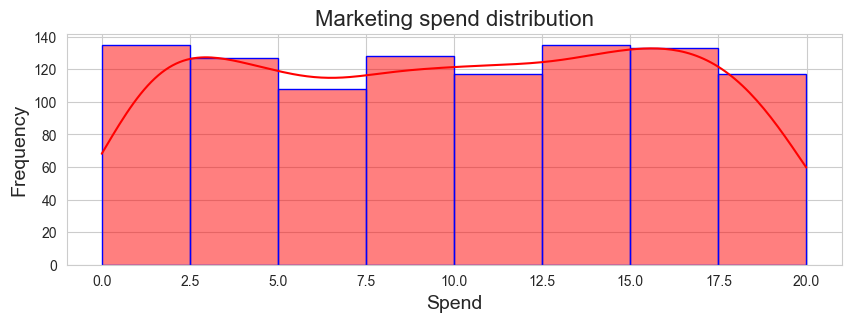

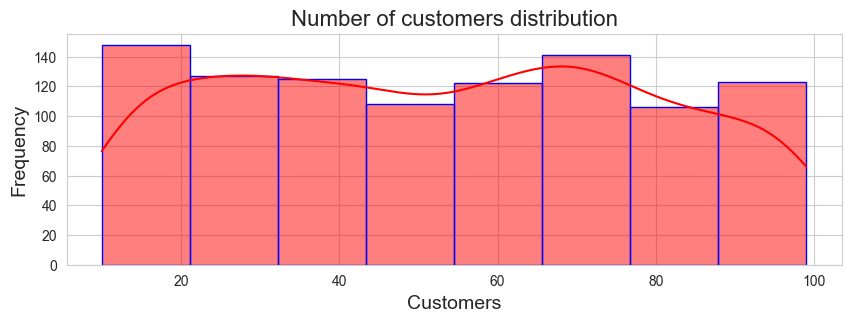

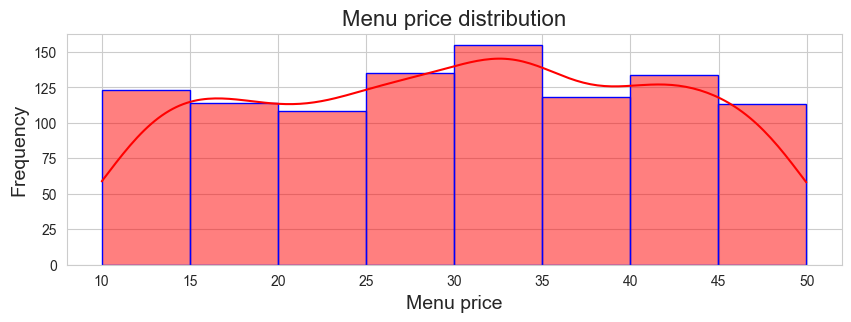

In [9]:



# Creating the histogram with Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(list(restaurant_data['Monthly_Revenue']), bins=8, kde=True, color='red', edgecolor='blue')
# Adding title and labels
plt.title('Monthly revenue distribution', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


# Creating the histogram with Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(list(restaurant_data['Average_Customer_Spending']), bins=8, kde=True, color='red', edgecolor='blue')
# Adding title and labels
plt.title('Average customer spending distribution', fontsize=16)
plt.xlabel('Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


# Creating the histogram with Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(list(restaurant_data['Marketing_Spend']), bins=8, kde=True, color='red', edgecolor='blue')
# Adding title and labels
plt.title('Marketing spend distribution', fontsize=16)
plt.xlabel('Spend', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


# Creating the histogram with Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(list(restaurant_data['Number_of_Customers']), bins=8, kde=True, color='red', edgecolor='blue')
# Adding title and labels
plt.title('Number of customers distribution', fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

# Creating the histogram with Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(list(restaurant_data['Menu_Price']), bins=8, kde=True, color='red', edgecolor='blue')
# Adding title and labels
plt.title('Menu price distribution', fontsize=16)
plt.xlabel('Menu price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

# <label style="color:blue" id="Exploratory-Data-Analysis">Part II : Data processing</label>

In [10]:
#Function shows percentage of missing values in a dataframe form
def missing_value_percentages(df) :
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    return missing_value_df

In [11]:
#ceating a dataframe that column and missing values percentage
cust_data_missing = missing_value_percentages(restaurant_data)

In [12]:
cust_data_missing

,column_name,percent_missing
Number_of_Customers,Number_of_Customers,0.0
Menu_Price,Menu_Price,0.0
Marketing_Spend,Marketing_Spend,0.0
Cuisine_Type,Cuisine_Type,0.0
Average_Customer_Spending,Average_Customer_Spending,0.0
Promotions,Promotions,0.0
Reviews,Reviews,0.0
Monthly_Revenue,Monthly_Revenue,0.0


In [13]:
#A function that detects the skewness of the data
def skewness_detector(dataset,col):
    skewness = skew(dataset[col])
    if skewness > 0:
        return "left-skewed"
    elif skewness < 0:
        return "left-skewed"
    else:
        return "symmetrical"

In [14]:
numeric_columns = restaurant_data.select_dtypes(include=['number']).columns

In [15]:
print(list(numeric_columns))

['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue']


In [16]:
cols_skewness = pd.DataFrame()
for column in numeric_columns:
    skewness = skewness_detector(restaurant_data,column)
    row = {'column':column,'skewness':skewness}
    cols_skewness = cols_skewness.append(row, ignore_index=True)
cols_skewness

,column,skewness
0,Number_of_Customers,left-skewed
1,Menu_Price,left-skewed
2,Marketing_Spend,left-skewed
3,Average_Customer_Spending,left-skewed
4,Promotions,left-skewed
5,Reviews,left-skewed
6,Monthly_Revenue,left-skewed


In [17]:
#Function that removes outliers IQR, used for normally left/right skewed data
def remove_outliers_iqr(data_frame,cols):
    cleaned_df = data_frame.copy()
    for column_name in cols:
        Q1 = cleaned_df[column_name].quantile(0.25)
        Q3 = cleaned_df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column_name] >= lower_bound) & (cleaned_df[column_name] <= upper_bound)]
    return cleaned_df

In [18]:
restaurant_data_wou = remove_outliers_iqr(restaurant_data,numeric_columns)

In [19]:
restaurant_data_wou.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,53.390955,30.251232,9.983004,29.483983,0.495477,49.883417,269.619853
std,26.270090,11.278393,5.834981,11.469257,0.500231,29.226626,102.102873
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-7.627382
25%,30.500000,20.478343,4.708948,19.641153,0.000000,24.000000,198.351905
50%,54.000000,30.869202,10.148927,29.211770,0.000000,50.000000,270.513361
75%,74.000000,39.894946,14.993962,39.556699,1.000000,76.000000,343.428722
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,542.467282


In [20]:
has_duplicates = restaurant_data_wou.duplicated().any()

if has_duplicates:
    print("DataFrame has duplicates.")
else:
    print("DataFrame has no duplicates.")

# Get duplicate counts
duplicate_counts = restaurant_data_wou.duplicated().sum()

print("Number of duplicate rows:", duplicate_counts)
restaurant_data_wou = restaurant_data_wou.drop_duplicates()

DataFrame has no duplicates.
Number of duplicate rows: 0


In [21]:
restaurant_data_wou = pd.get_dummies(restaurant_data_wou, columns=['Cuisine_Type']) 

# <label style="color:blue" id="Exploratory-Data-Analysis">Part III : Feature selection</label>

In [22]:
# Keep track of feature names
X = restaurant_data_wou.drop(columns=['Monthly_Revenue'])
y = restaurant_data_wou['Monthly_Revenue']
feature_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Variance Threshold
def variance_threshold_selector(data, threshold=0.01):
    selector = VarianceThreshold(threshold)
    return selector.fit_transform(data), selector.get_support(indices=True)

# Apply Variance Threshold to the training and testing sets
X_train_var, selected_indices_var = variance_threshold_selector(X_train, threshold=0.01)
X_test_var = X_test.iloc[:, selected_indices_var].values  # Apply same indices to test set

# Update feature names after Variance Threshold
feature_names_var = feature_names[selected_indices_var]

# Feature Selection using Correlation Coefficient
def correlation_coefficient_selector(X, y, threshold=0.2):
    selected_features = []
    for i in range(X.shape[1]):
        corr, _ = pearsonr(X[:, i], y)
        if abs(corr) >= threshold:
            selected_features.append(i)
    return selected_features

# Get the selected feature indices based on correlation coefficient
selected_features_corr = correlation_coefficient_selector(X_train_var, y_train, threshold=0.2)

# Reduce data to selected features
X_train_selected = X_train_var[:, selected_features_corr]
X_test_selected = X_test_var[:, selected_features_corr]

# Update feature names after Correlation Coefficient
feature_names_selected = feature_names_var[selected_features_corr]
print(f'Selected Feature Names: {list(feature_names_selected)}')

Selected Feature Names: ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend']


# <label style="color:blue" id="Exploratory-Data-Analysis">Part IV : Modelling</label>

In [23]:
# Train MLP Regressor with selected features
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_selected, y_train)

MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# <label style="color:blue" id="Exploratory-Data-Analysis">Part V : Evaluation</label>

In [24]:
# Predict and evaluate
y_pred = mlp.predict(X_test_selected)
y_pred_train = mlp.predict(X_train_selected)

# Calculate evaluation metrics (Test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test_selected.shape[1]-1)
explained_variance = explained_variance_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
# Calculate evaluation metrics( Train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
r2_train = r2_score(y_train, y_pred_train)
adjusted_r2_train = 1 - (1-r2_train) * (len(y_pred_train)-1) / (len(y_pred_train)-X_test_selected.shape[1]-1)
explained_variance_train = explained_variance_score(y_train, y_pred_train)
median_ae_train = median_absolute_error(y_train, y_pred_train)

In [25]:
# Calculate evaluation metrics for test set
metrics_test = {
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'Mean Absolute Percentage Error (MAPE)': mape,
    'R-squared (R2)': r2,
    'Adjusted R-squared (Adj R2)': adjusted_r2,
    'Explained Variance Score': explained_variance,
    'Median Absolute Error (MedAE)': median_ae
}

# Calculate evaluation metrics for training set
metrics_train = {
    'Mean Squared Error (MSE)': mse_train,
    'Root Mean Squared Error (RMSE)': rmse_train,
    'Mean Absolute Error (MAE)': mae_train,
    'Mean Absolute Percentage Error (MAPE)': mape_train,
    'R-squared (R2)': r2_train,
    'Adjusted R-squared (Adj R2)': adjusted_r2_train,
    'Explained Variance Score': explained_variance_train,
    'Median Absolute Error (MedAE)': median_ae_train
}

# Create DataFrames
df_test = pd.DataFrame(metrics_test, index=[''])
df_train = pd.DataFrame(metrics_train, index=[''])


# Create a DataFrame with both test and training values and their percentage difference
df_combined = pd.concat([df_test, df_train], keys=['Test', 'Train'])


In [31]:
df_combined

,,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2),Adjusted R-squared (Adj R2),Explained Variance Score,Median Absolute Error (MedAE)
Test,,3101.190039,55.688329,44.673350,34.621679,0.668191,0.663087,0.668609,38.247343
Train,,3343.918796,57.826627,46.166383,26.933904,0.686849,0.685663,0.686880,38.989512


#### Hyper parameter tuning

In [28]:
# Hyperparameter tuning for MLPRegressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_mlp = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [29]:
best_mlp = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_mlp.predict(X_test_selected)


# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test_selected.shape[1]-1)
explained_variance = explained_variance_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

print(f'Selected Feature Names: {list(feature_names_selected)}')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Median Absolute Error: {median_ae}')

Selected Feature Names: ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend']
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Mean Squared Error: 3114.6356653044277
Root Mean Squared Error: 55.80892101899505
Mean Absolute Error: 44.847952111649775
Mean Absolute Percentage Error: 35.57621398309558
R-squared: 0.6667527201811814
Adjusted R-squared: 0.6616258389531995
Explained Variance Score: 0.6668117055447782
Median Absolute Error: 41.68573535724991


# <label style="color:blue" id="Exploratory-Data-Analysis">Part V : Conclusion</label>